In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(16,9))
import scipy.stats as stats
import env
from prepare import prepare_df, create_features
from preprocessing import create_features, spotify_split

In [2]:
df = pd.read_csv('data/playlist-offset-5900.csv', index_col=0)

### Summarize Data

In [3]:
df.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Paigey Cakey,Boyfriend,2016-11-28,Boyfriend,117tk0mFFLonDcQjE4Zv2V,3,UD Music Ltd,0.686,0.807,6,...,0.484,108.660,156000,4,True,6.0,1.0,1.0,57hy8HzXQ9IwwUj77iu67B,single
1,Chanel West Coast,Now You Know,2016-02-19,Alcoholic,0At8Itf2k8Nx97DDislS3g,37,BornRich,0.775,0.741,8,...,0.449,93.958,203651,4,True,41.0,1.0,4.0,1Zbf3JCcUIXWAcJIYuyFau,album
2,K Rizz,Yes Bitch,2016-01-03,Yes Bitch,0m4ippxgzHvZTuJYXdJIkx,23,K Rizz,0.927,0.649,9,...,0.339,94.039,130213,4,True,29.0,1.0,1.0,5abmMmYe2imIF7uXyPnRjp,single
3,Ruby Ibarra,Circa91,2017-10-03,"Us (feat. Rocky Rivera, Klassy & Faith Santilla)",1kjqhIzMFcUjFnSoYLkPZ1,35,Beatrock Music LLC,0.797,0.513,9,...,0.188,138.022,268107,4,True,35.0,1.0,14.0,3lGb6gsSUEl4msX4q8vAZz,album
4,Sammus,1080P,2016-01-26,1080P,2mznA0FPYkxpA9h8w9NRNS,14,NuBlack Music Group,0.699,0.605,7,...,0.378,82.348,248726,3,True,20.0,1.0,1.0,6zc741JGQFKHNhdcD5gfVw,single


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            76 non-null     object 
 1   album             76 non-null     object 
 2   release_date      76 non-null     object 
 3   track_name        76 non-null     object 
 4   track_id          76 non-null     object 
 5   album_popularity  76 non-null     int64  
 6   label             76 non-null     object 
 7   danceability      76 non-null     float64
 8   energy            76 non-null     float64
 9   key               76 non-null     int64  
 10  loudness          76 non-null     float64
 11  mode              76 non-null     int64  
 12  speechiness       76 non-null     float64
 13  instrumentalness  76 non-null     float64
 14  liveness          76 non-null     float64
 15  valence           76 non-null     float64
 16  tempo             76 non-null     float64
 17 

In [5]:
df = create_features(df)
#df['decade'] = pd.cut(x=df.release_year, bins=[1979,1989,1999,2009,2019,2029], 
                                                #labels=['80s','90s','2000s','2010s','2020s'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   artist                  76 non-null     object  
 1   album                   76 non-null     object  
 2   release_date            76 non-null     object  
 3   track_name              76 non-null     object  
 4   track_id                76 non-null     object  
 5   album_popularity        76 non-null     int64   
 6   label                   76 non-null     object  
 7   danceability            76 non-null     float64 
 8   energy                  76 non-null     float64 
 9   key                     76 non-null     int64   
 10  loudness                76 non-null     float64 
 11  mode                    76 non-null     int64   
 12  speechiness             76 non-null     float64 
 13  instrumentalness        76 non-null     float64 
 14  liveness                76 n

In [7]:
df = df.dropna()

In [8]:
# change explicit column to int
df['explicit'] = df.explicit.astype('int')
df['is_featured_artist'] = df.is_featured_artist.astype('int')
df['disc_number'] = df.disc_number.astype('int')
df['mode'] = df['mode'].astype('int')
df['key'] = df.key.astype('int')
df['duration_seconds'] = df.duration_seconds.astype('int')
df['duration_minutes'] = df.duration_minutes.astype('int')
df['duration_ms'] = df.duration_ms.astype('int')
df['popularity'] = df.popularity.astype('int')
df['time_signature'] = df.time_signature.astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   artist                  76 non-null     object  
 1   album                   76 non-null     object  
 2   release_date            76 non-null     object  
 3   track_name              76 non-null     object  
 4   track_id                76 non-null     object  
 5   album_popularity        76 non-null     int64   
 6   label                   76 non-null     object  
 7   danceability            76 non-null     float64 
 8   energy                  76 non-null     float64 
 9   key                     76 non-null     int64   
 10  loudness                76 non-null     float64 
 11  mode                    76 non-null     int64   
 12  speechiness             76 non-null     float64 
 13  instrumentalness        76 non-null     float64 
 14  liveness                76 n

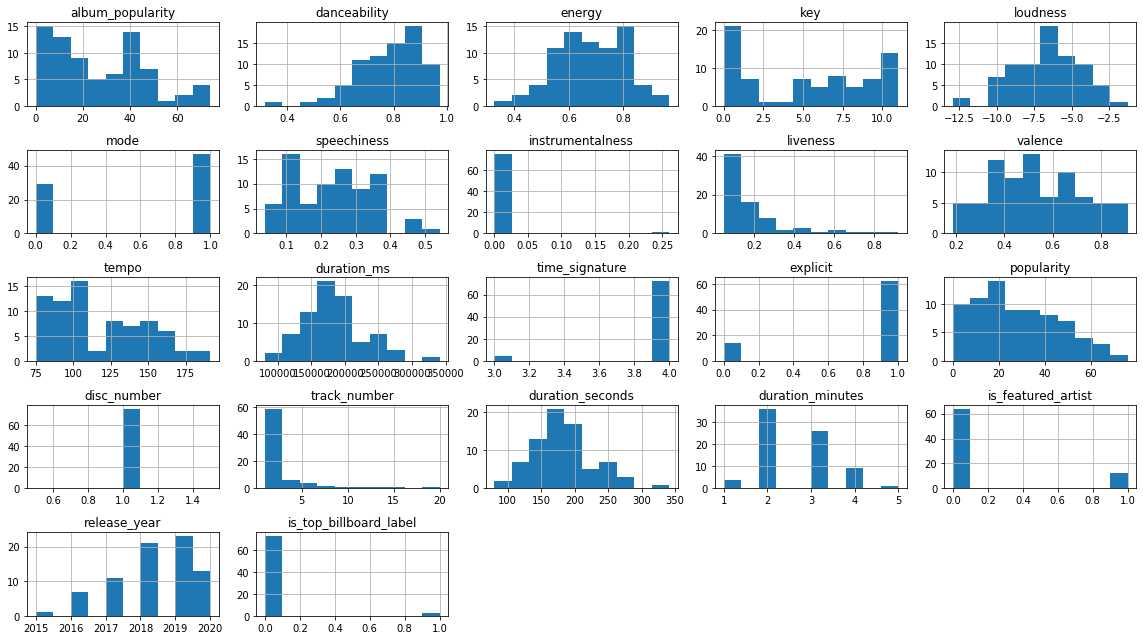

In [10]:
# distribution of variables
df.hist()
plt.tight_layout()

In [11]:
# value counts for all variables except 2
for col in df.drop(columns=['artist', 'album']).columns:
    print(df[col].value_counts(),'\n')

2019-10-11    2
2018-06-01    2
2018-09-07    2
2019-09-26    2
2020-02-28    2
             ..
2015-12-18    1
2016-10-14    1
2019-01-25    1
2017-12-01    1
2017-04-21    1
Name: release_date, Length: 71, dtype: int64 

stupid (feat. yung baby tate)    1
my way                           1
lgbt                             1
revoke thee                      1
sing to her                      1
                                ..
smoke.netflix.chill.             1
indian hair                      1
broken pussy                     1
i’ma go crazy                    1
cartier vision                   1
Name: track_name, Length: 76, dtype: int64 

6uWUBTVd9KXEH79qigDwcv    1
6I1SxiBdklPbxXRuhoO6uG    1
0rDqLVWxe9ngG48EWM4Whq    1
7GFRxsRFuaSgPBxvYnrYDL    1
1FIrDyonP9mt22pbweoUBy    1
                         ..
2Vd5syAsJPUfdjJwctev7s    1
0y7HLu09gngbeOOByzI1C0    1
5mAERlwGIlGyuROXeT3VPI    1
5AKcztfsL5l6xmb54kAUkA    1
4TMH6h2ugqeTBY7tBQEedF    1
Name: track_id, Length: 76, dtype: int6

In [12]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')
train.head(3)

Shape of train: (52, 32) | Shape of validate: (12, 32) | Shape of test: (12, 32)
Percent train: 68.0        | Percent validate: 16.0       | Percent test: 16.0


,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,decade,is_top_billboard_label
24,daisha mcbride,cake up,2018-09-28,cake up,40CqFvbozacpd70Dbqx9Bk,3,Daisha McBride,0.973,0.562,10,...,3QR2hZUZam7fTdcIwWQhyr,single,187,3,0,2018,09,28,2010s,0
7,various artists,insecure: music from the hbo original series,2016-12-16,broken pussy,1IWzr4t0ymLCo8CkQ8q5oc,42,RCA Records Label,0.887,0.405,6,...,768HEXhXFM0O8cP2ObI3RA,compilation,80,1,0,2016,12,16,2010s,0
18,neisha neshae,i’ma go crazy,2017-07-07,i’ma go crazy,7D4vuOIW97ZT5UzTdIRFK5,42,Neisha Neshae,0.725,0.646,1,...,5i9zUFdOXMFRMm3mvT6BAJ,single,186,3,0,2017,07,07,2010s,0


In [13]:
train.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,decade,is_top_billboard_label
24,daisha mcbride,cake up,2018-09-28,cake up,40CqFvbozacpd70Dbqx9Bk,3,Daisha McBride,0.973,0.562,10,...,3QR2hZUZam7fTdcIwWQhyr,single,187,3,0,2018,09,28,2010s,0
7,various artists,insecure: music from the hbo original series,2016-12-16,broken pussy,1IWzr4t0ymLCo8CkQ8q5oc,42,RCA Records Label,0.887,0.405,6,...,768HEXhXFM0O8cP2ObI3RA,compilation,80,1,0,2016,12,16,2010s,0
18,neisha neshae,i’ma go crazy,2017-07-07,i’ma go crazy,7D4vuOIW97ZT5UzTdIRFK5,42,Neisha Neshae,0.725,0.646,1,...,5i9zUFdOXMFRMm3mvT6BAJ,single,186,3,0,2017,07,07,2010s,0
28,queen key,eat my pussy,2018-06-01,my way,0ChBY4SDZOrsfRCRiXAVXz,55,Machine Entertainment Group,0.846,0.809,11,...,6zVy1Z13ikciM5KIsStBI7,album,144,2,0,2018,06,01,2010s,0
15,latashá,revoke thee,2017-01-13,revoke thee,77Rl156eR5gbduBoEmwr1K,3,Latasha Alcindor,0.745,0.542,1,...,4kIApyDI08rn9omsUki4D9,single,174,2,0,2017,01,13,2010s,0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 24 to 2
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   artist                  52 non-null     object  
 1   album                   52 non-null     object  
 2   release_date            52 non-null     object  
 3   track_name              52 non-null     object  
 4   track_id                52 non-null     object  
 5   album_popularity        52 non-null     int64   
 6   label                   52 non-null     object  
 7   danceability            52 non-null     float64 
 8   energy                  52 non-null     float64 
 9   key                     52 non-null     int64   
 10  loudness                52 non-null     float64 
 11  mode                    52 non-null     int64   
 12  speechiness             52 non-null     float64 
 13  instrumentalness        52 non-null     float64 
 14  liveness                52 n

In [15]:
cat_vars = ['key', 'mode', 'time_signature', 'explicit', 'disc_number',
            'is_featured_artist']
cont_vars = ['danceability', 'energy', 'loudness', 'speechiness', 
             'instrumentalness', 'liveness', 'valence','tempo', 
             'duration_seconds']

In [16]:
#Continuous variable relationships with Popularity
#sns.pairplot(data=train[cont_vars + ['popularity']])
#plt.tight_layout()

<div class="alert alert-block alert-info">Takeaways: 
    <li>We may find some useful clusters since there is some spread in the variable relationships</li>
<li>There's no apparent linear relationships with popularity</li>
<li>more data is definitely needed</li>
<li>seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)</li>
</div>

---

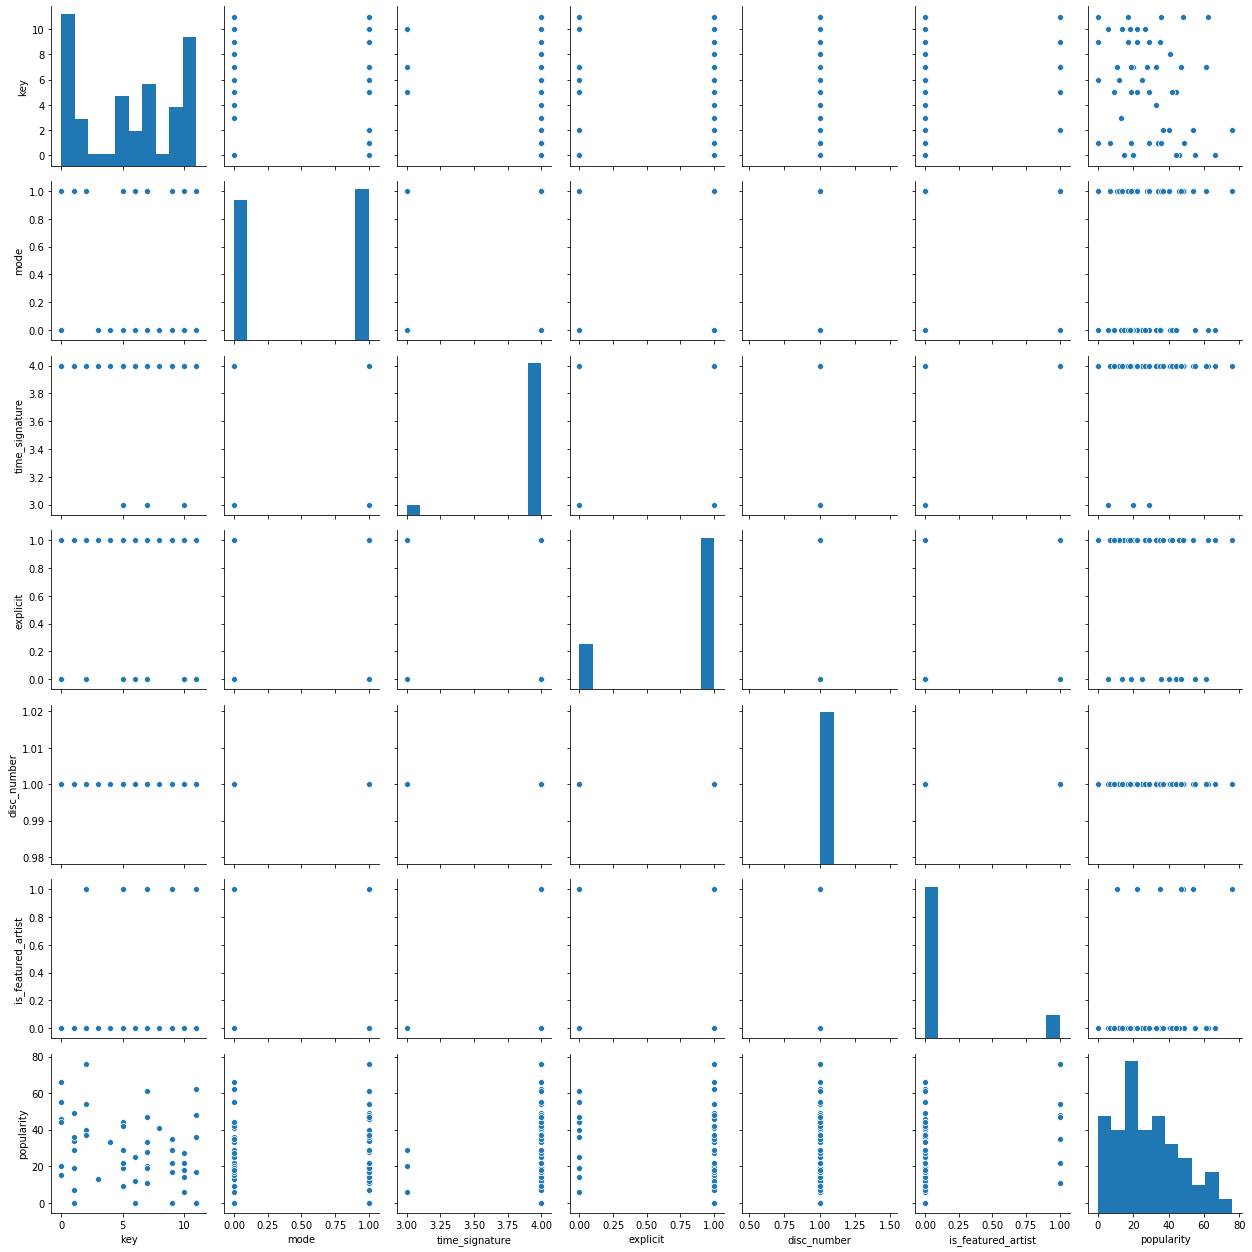

In [17]:
#Categorical variable relationships with Popularity
sns.pairplot(data=train[cat_vars + ['popularity']])
plt.tight_layout()

<div class="alert alert-block alert-info">Takeaways: 
<li>popularity seems to decrease with disc number</li>
<li>a higher time signature seems to indicate higher popularity, namely '4'</li>
</div>

---

In [18]:
train.nunique()

artist                    50
album                     52
release_date              48
track_name                52
track_id                  52
album_popularity          33
label                     49
danceability              51
energy                    50
key                       12
loudness                  52
mode                       2
speechiness               50
instrumentalness          18
liveness                  49
valence                   48
tempo                     52
duration_ms               52
time_signature             2
explicit                   2
popularity                37
disc_number                1
track_number              12
album_id                  52
album_type                 3
duration_seconds          44
duration_minutes           4
is_featured_artist         2
release_year               5
release_month             11
release_day               23
decade                     2
is_top_billboard_label     2
dtype: int64

<div class="alert alert-block alert-info">Takeaways<br><br>
    Categorical variables
   <li> key</li>
    <li> mode</li>
    <li> time_signature</li>
    <li> explicit</li>
        <br>
    Continuous variables
    <li> danceability</li>
    <li> energy</li>
    <li> loudness</li>
    <li> speechiness</li>
    <li> instrumentalness</li>
    <li> liveness</li>
    <li> valence</li>
    <li> tempo</li>
    <li> duration_ms</li>
    </div>

---

In [19]:
train.describe()

,album_popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,...,time_signature,explicit,popularity,disc_number,track_number,duration_seconds,duration_minutes,is_featured_artist,release_year,is_top_billboard_label
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,28.096154,0.773058,0.671327,5.538462,-6.831173,0.519231,0.214329,0.005178,0.200583,0.517135,...,3.942308,0.769231,28.615385,1.0,2.730769,179.673077,2.557692,0.134615,2018.153846,0.038462
std,21.505366,0.131551,0.137636,3.832071,2.263349,0.504505,0.109948,0.036037,0.172289,0.195164,...,0.235435,0.425436,18.494465,0.0,3.343800,39.559199,0.725271,0.344642,1.242777,0.194184
min,0.000000,0.317000,0.326000,0.000000,-12.910000,0.000000,0.060900,0.000000,0.063100,0.188000,...,3.000000,0.000000,0.000000,1.0,1.000000,80.000000,1.000000,0.000000,2016.000000,0.000000
25%,11.750000,0.697000,0.577750,1.750000,-8.468000,0.000000,0.113500,0.000000,0.095450,0.377000,...,4.000000,1.000000,16.500000,1.0,1.000000,161.000000,2.000000,0.000000,2017.000000,0.000000
50%,22.500000,0.787500,0.668500,6.000000,-6.922000,1.000000,0.207000,0.000000,0.120000,0.502500,...,4.000000,1.000000,27.500000,1.0,1.000000,179.000000,2.500000,0.000000,2018.000000,0.000000
75%,40.500000,0.869250,0.770000,9.000000,-5.615250,1.000000,0.290000,0.000012,0.227000,0.640750,...,4.000000,1.000000,41.250000,1.0,3.000000,195.250000,3.000000,0.000000,2019.000000,0.000000
max,74.000000,0.973000,0.967000,11.000000,-1.284000,1.000000,0.542000,0.260000,0.810000,0.909000,...,4.000000,1.000000,76.000000,1.0,15.000000,268.000000,4.000000,1.000000,2020.000000,1.000000


<div class="alert alert-block alert-info">Takeaways: 
<li> We may find some useful clusters since there is some spread in the variable relationships</li>
<li> There's no apparent linear relationships with popularity</li>
<li> more data is definitely needed</li>
<li> seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)</li></div>

In [20]:
train.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,decade,is_top_billboard_label
24,daisha mcbride,cake up,2018-09-28,cake up,40CqFvbozacpd70Dbqx9Bk,3,Daisha McBride,0.973,0.562,10,...,3QR2hZUZam7fTdcIwWQhyr,single,187,3,0,2018,09,28,2010s,0
7,various artists,insecure: music from the hbo original series,2016-12-16,broken pussy,1IWzr4t0ymLCo8CkQ8q5oc,42,RCA Records Label,0.887,0.405,6,...,768HEXhXFM0O8cP2ObI3RA,compilation,80,1,0,2016,12,16,2010s,0
18,neisha neshae,i’ma go crazy,2017-07-07,i’ma go crazy,7D4vuOIW97ZT5UzTdIRFK5,42,Neisha Neshae,0.725,0.646,1,...,5i9zUFdOXMFRMm3mvT6BAJ,single,186,3,0,2017,07,07,2010s,0
28,queen key,eat my pussy,2018-06-01,my way,0ChBY4SDZOrsfRCRiXAVXz,55,Machine Entertainment Group,0.846,0.809,11,...,6zVy1Z13ikciM5KIsStBI7,album,144,2,0,2018,06,01,2010s,0
15,latashá,revoke thee,2017-01-13,revoke thee,77Rl156eR5gbduBoEmwr1K,3,Latasha Alcindor,0.745,0.542,1,...,4kIApyDI08rn9omsUki4D9,single,174,2,0,2017,01,13,2010s,0


---
# Correlation Tests: Linear correlation with Popularity

In [21]:
train[cont_vars + ['popularity']].corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
energy              0.320776
loudness            0.280632
valence             0.160133
tempo               0.098091
liveness            0.040004
speechiness         0.037195
duration_seconds   -0.016255
danceability       -0.127222
instrumentalness   -0.221557
Name: popularity, dtype: float64

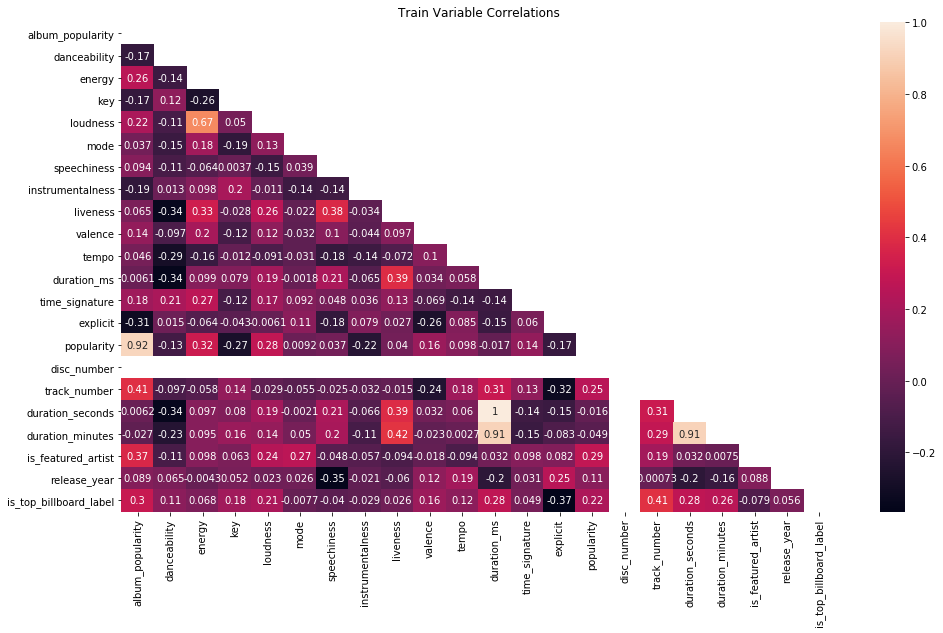

In [22]:
plt.title('Train Variable Correlations')
plt.rc('figure', figsize=(16,9))
sns.heatmap(train.corr(), annot=True, mask= np.triu(np.ones_like(train.corr(), dtype=np.bool)))

> **Does liveness have any correlation with a song's popularity?**

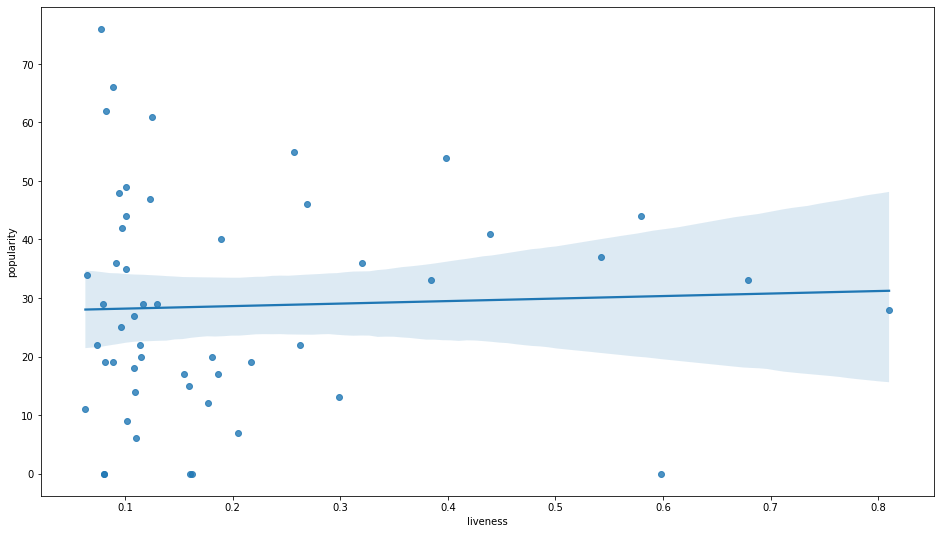

In [23]:
sns.regplot(x='liveness', y='popularity', data=train)

- $H_0$: There is no linear relationship between liveness and popularity.
- $H_a$: There is a linear relationship between liveness and popularity.

In [24]:
null = 'there is no linear relationship between liveness and popularity'

x = train.liveness
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

r = 0.04000436466137485
p = 0.7782688533717832
We fail to reject the null that there is no linear relationship between liveness and popularity


<div class="alert alert-block alert-info">Conclusion: Liveness and popularity have a small negative linear relationship, <b>r: -.07</b></div>

---

> **Does song length have any correlation with a song's popularity?**

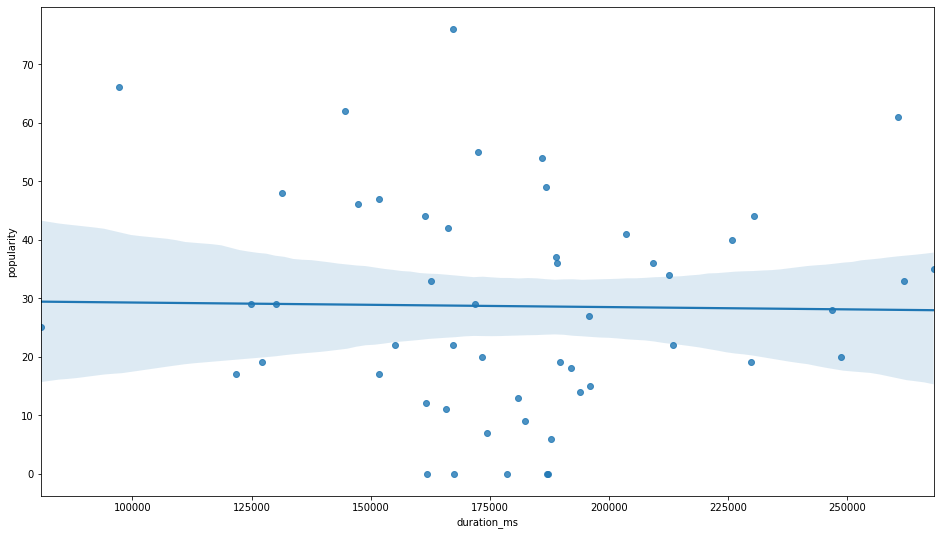

In [25]:
sns.regplot(x='duration_ms', y='popularity', data=train)

- $H_0$: There is no linear relationship between song length and popularity.
- $H_a$: There is a linear relationship between song length and popularity.

In [26]:
null = 'there is no linear relationship between song length and popularity'

x = train.duration_ms
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

r = -0.016693183174257158
p = 0.9064970086897456
We fail to reject the null that there is no linear relationship between song length and popularity


<div class="alert alert-block alert-info">Conclusion: Song length and popularity have a small negative linear relationship, <b>r: -.07</b></div>

---

# T-Tests: Comparing Mean Popularity

> **Is the mean popularity of songs with time signature 4 significantly greater than the mean popularity of all songs(within the train data)?**

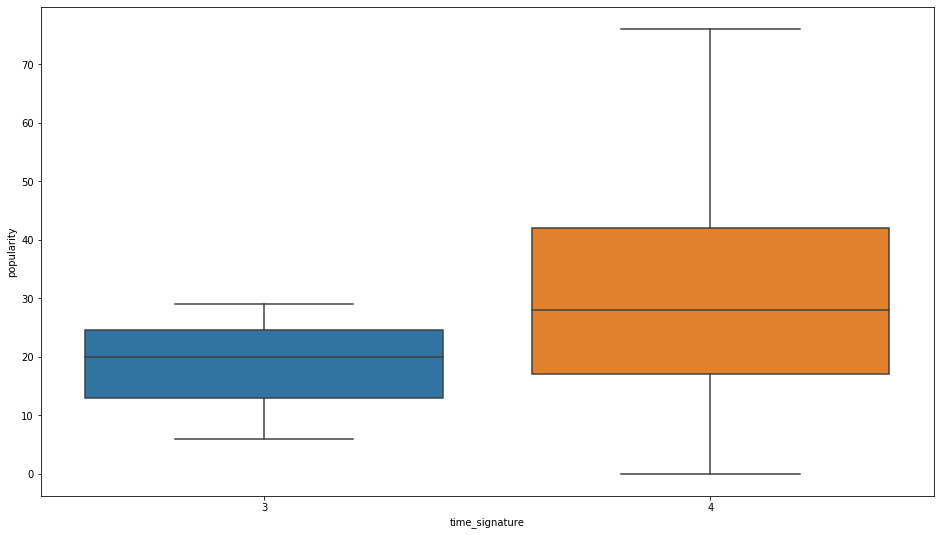

In [27]:
sns.boxplot(x='time_signature', y='popularity', data=train)

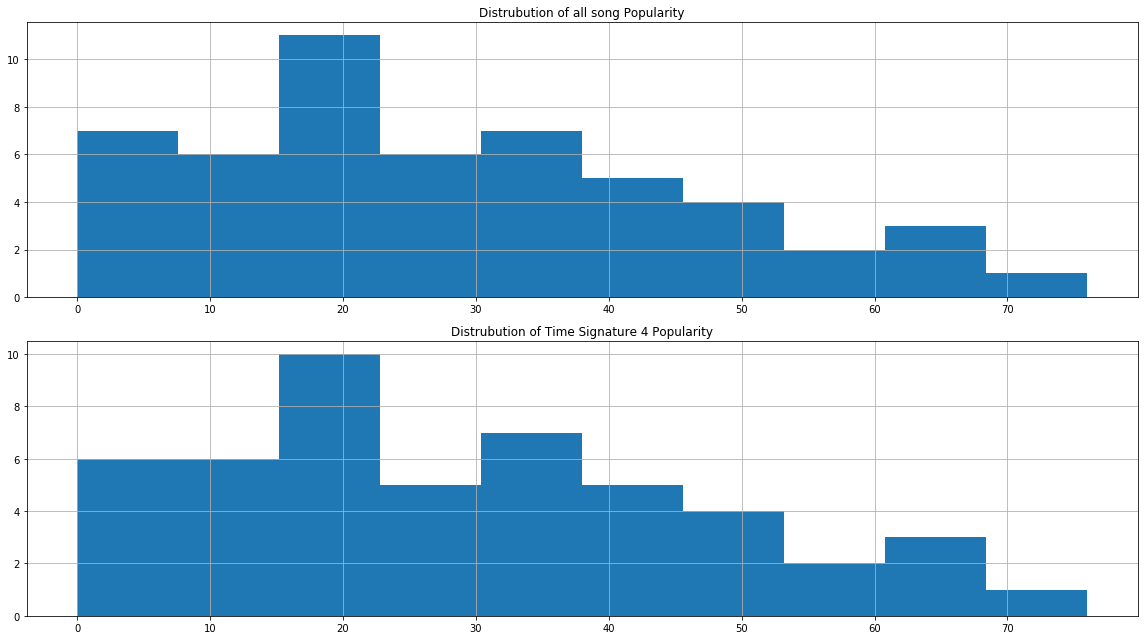

In [28]:
plt.subplot(211)
plt.title('Distrubution of all song Popularity')
train.popularity.hist()

plt.subplot(212)
plt.title('Distrubution of Time Signature 4 Popularity')
train[train.time_signature == 4].popularity.hist(label='time sig 4')
plt.tight_layout()

In [29]:
train.time_signature.value_counts()

4    49
3     3
Name: time_signature, dtype: int64

**Hypothesis**

$H_{0}$: Mean of popularity of time signature 4 =< Mean of popularity of all songs

$H_{a}$: Mean of popularity of time signature 4 > Mean of popularity of all songs

In [30]:
null = 'the mean of popularity of time signature 4 =< mean of popularity of all songs'

sample = train[train.time_signature == 4].popularity
overall = train.popularity.mean()

alpha = .05

t, p = stats.ttest_1samp(sample, overall)
print('t =', t)
print('p =', p)

if p/2 > alpha:
    print('We fail to reject the null that', null)
elif t < 0:
    print('We fail to reject the null that', null)
else:
    print('We reject the null that', null)
    
print('Overall mean', overall, '\n Sample mean', sample.mean())

t = 0.2352689753294831
p = 0.8150008338726538
We fail to reject the null that the mean of popularity of time signature 4 =< mean of popularity of all songs
Overall mean 28.615384615384617 
 Sample mean 29.244897959183675


<div class="alert alert-block alert-info">Conclusion: The mean popularity of time signature 4 is not significantly greater than the overall mean popularity</div>

---

> **Do tracks in a major key tend to be more popular than tracks in a minor key?**

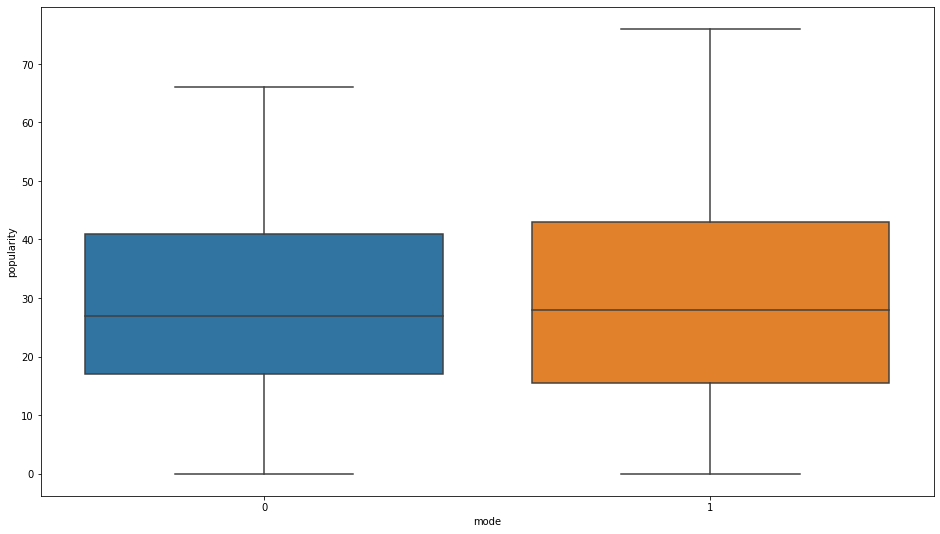

In [31]:
sns.boxplot(x='mode', y='popularity', data=train)

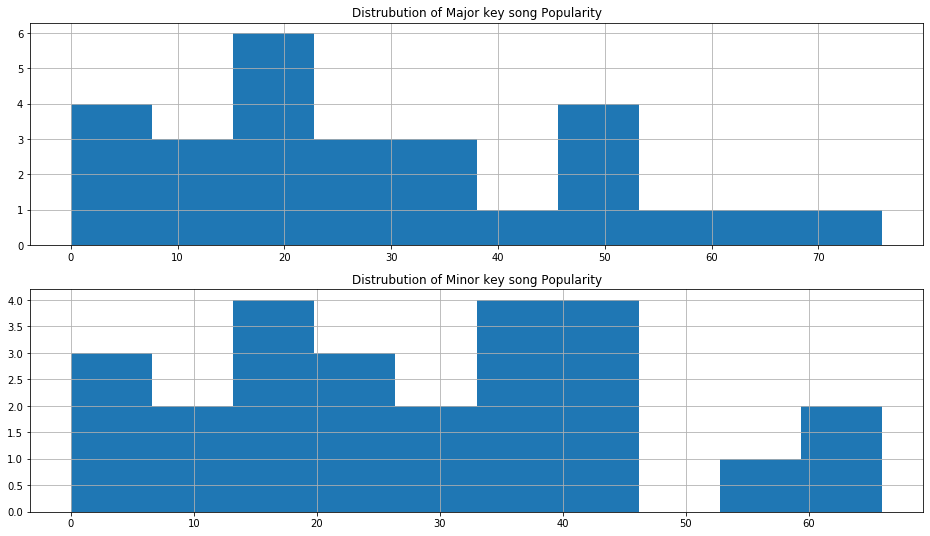

In [32]:
plt.subplot(211)
plt.title('Distrubution of Major key song Popularity')
train[train['mode'] == 1].popularity.hist()
plt.subplot(212)
plt.title('Distrubution of Minor key song Popularity')
train[train['mode'] == 0].popularity.hist()

In [33]:
train['mode'].value_counts()

1    27
0    25
Name: mode, dtype: int64

In [34]:
print(train[train['mode'] == 1].popularity.var())
print(train[train['mode'] == 0].popularity.var())

379.17948717948724
316.0066666666666


**Hypothesis**

$H_{0}$: Mean of popularity of major key songs =< Mean of popularity of minor key songs

$H_{a}$: Mean of popularity of major key songs > Mean of popularity of minor key songs

In [35]:
null = 'the mean of popularity of time signature 4 =< mean of popularity of all songs'

major = train[train['mode'] == 1].popularity
minor = train[train['mode'] == 0].popularity

alpha = .05

t, p = stats.ttest_ind(major, minor)
print('t =', t)
print('p =', p)

if p/2 > alpha:
    print('We fail to reject the null that', null)
elif t < 0:
    print('We fail to reject the null that', null)
else:
    print('We reject the null that', null)
    
print('Major mean', major.mean()) 
print('Minor mean', minor.mean())

t = 0.06515651665708519
p = 0.9483091998931475
We fail to reject the null that the mean of popularity of time signature 4 =< mean of popularity of all songs
Major mean 28.77777777777778
Minor mean 28.44


<div class="alert alert-block alert-info">Conclusion: The mean popularity of major key songs is not significantly greater than the mean popularity of minor key songs </div>

---

- is there a significant difference in highest popularity group vs lowest pop group in tempo? T-test (replace tempo with other features as well, possible create a loop)